# 1 Data Pre-processing

In [2]:
# Loading libraries
import json
import pandas as pd
from shapely import MultiLineString, LineString
import kagglehub
import geopandas as gpd
import networkx as nx
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import igraph as ig

In [3]:
# Download latest version
path = kagglehub.dataset_download("sndorburian/underwater-marine-data-cables")
data = json.load(open("../data/kaggle/underwatercable.json"))
df_undersea = pd.DataFrame(data["features"])
df_undersea

,type,properties,geometry
0,Feature,"{'id': 'carnival-submarine-network-1-csn-1', '...","{'type': 'MultiLineString', 'coordinates': [[[..."
1,Feature,"{'id': 'sea-h2x', 'name': 'SEA-H2X', 'color': ...","{'type': 'MultiLineString', 'coordinates': [[[..."
2,Feature,"{'id': 'hronn', 'name': 'Hronn', 'color': '#00...","{'type': 'MultiLineString', 'coordinates': [[[..."
3,Feature,"{'id': 'cook-strait', 'name': 'Cook Strait', '...","{'type': 'MultiLineString', 'coordinates': [[[..."
4,Feature,"{'id': 'minoas-east-and-west', 'name': 'Minoas...","{'type': 'MultiLineString', 'coordinates': [[[..."
...,...,...,...
505,Feature,"{'id': 'pgascom', 'name': 'PGASCOM', 'color': ...","{'type': 'MultiLineString', 'coordinates': [[[..."
506,Feature,{'id': 'boracay-palawan-submarine-cable-system...,"{'type': 'MultiLineString', 'coordinates': [[[..."
507,Feature,"{'id': 'saudi-arabia-sudan-1-sas-1', 'name': '...","{'type': 'MultiLineString', 'coordinates': [[[..."
508,Feature,"{'id': 'falcon', 'name': 'FALCON', 'color': '#...","{'type': 'MultiLineString', 'coordinates': [[[..."


In [4]:
name_list = []
id_list = []
color_list = []

for i in df_undersea.index:
    name_i = df_undersea.loc[i].properties["name"]
    name_list.append(name_i)
    id_i = df_undersea.loc[i].properties["id"]
    id_list.append(id_i)
    color_i = df_undersea.loc[i].properties["color"]
    color_list.append(color_i)

geom_list = []
for i in df_undersea.index:
    geom_i = MultiLineString(pd.DataFrame(data["features"]).geometry.loc[i]["coordinates"])
    geom_list.append(geom_i)

gdf_undersea = df_undersea.copy(deep=False)
gdf_undersea = gpd.GeoDataFrame(gdf_undersea, geometry = geom_list)
gdf_undersea = gdf_undersea.set_crs(4326)

gdf_undersea["id"] = id_list
gdf_undersea["name"] = name_list
gdf_undersea["color"] = color_list

gdf_undersea

,type,properties,geometry,id,name,color
0,Feature,"{'id': 'carnival-submarine-network-1-csn-1', '...","MULTILINESTRING ((-79.53671 8.96483, -79.42487...",carnival-submarine-network-1-csn-1,Carnival Submarine Network-1 (CSN-1),#939597
1,Feature,"{'id': 'sea-h2x', 'name': 'SEA-H2X', 'color': ...","MULTILINESTRING ((113.84999 17.10852, 116.9999...",sea-h2x,SEA-H2X,#939597
2,Feature,"{'id': 'hronn', 'name': 'Hronn', 'color': '#00...","MULTILINESTRING ((5.40007 55.3559, 5.28757 55....",hronn,Hronn,#009f94
3,Feature,"{'id': 'cook-strait', 'name': 'Cook Strait', '...","MULTILINESTRING ((174.23597 -41.33903, 174.431...",cook-strait,Cook Strait,#951f63
4,Feature,"{'id': 'minoas-east-and-west', 'name': 'Minoas...","MULTILINESTRING ((23.03575 36.52322, 23.28756 ...",minoas-east-and-west,Minoas East and West,#939597
...,...,...,...,...,...,...
505,Feature,"{'id': 'pgascom', 'name': 'PGASCOM', 'color': ...","MULTILINESTRING ((103.70596 1.25931, 103.86558...",pgascom,PGASCOM,#7c9e3e
506,Feature,{'id': 'boracay-palawan-submarine-cable-system...,"MULTILINESTRING ((120.20077 12.00543, 120.3749...",boracay-palawan-submarine-cable-system,Boracay-Palawan Submarine Cable System,#2b51a3
507,Feature,"{'id': 'saudi-arabia-sudan-1-sas-1', 'name': '...","MULTILINESTRING ((37.21968 19.61557, 37.58924 ...",saudi-arabia-sudan-1-sas-1,Saudi Arabia-Sudan-1 (SAS-1),#68bc45
508,Feature,"{'id': 'falcon', 'name': 'FALCON', 'color': '#...","MULTILINESTRING ((43.00854 14.68566, 42.75004 ...",falcon,FALCON,#c62026


In [5]:
gdf_undersea.explore()

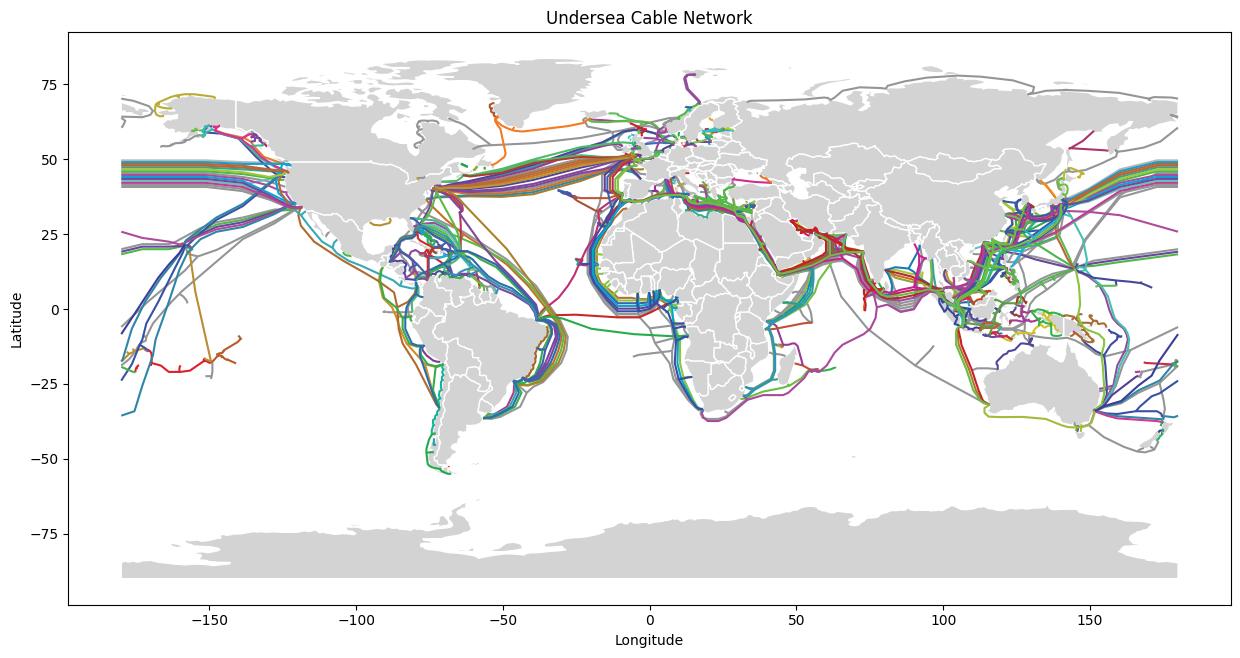

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

# Plot a world basemap
world = gpd.read_file("../data/map_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot(ax=ax, color="lightgray", edgecolor="white")

gdf_undersea.plot(ax=ax, color=gdf_undersea.color, edgecolor="black", markersize=25)
ax.set_title("Undersea Cable Network")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# 2 Graph Network

## 2.1 Graph Creation & Analysis

In [12]:
# Setting up an empty graph
G = nx.Graph()

In [13]:
# Reading in the GeoJSON files of the edges and nodes as GeoPandas
gdf_nodes_json = gpd.read_file('../data/gdf_nodes.geojson')
gdf_edges_json = gpd.read_file('../data/gdf_edges.geojson')

In [14]:
gdf_nodes_json

,node_id,cable_id,geometry
0,node_0000,carnival-submarine-network-1-csn-1,POINT (-79.53671 8.96483)
1,node_0001,carnival-submarine-network-1-csn-1,POINT (-79.42487 8.19054)
2,node_0002,carnival-submarine-network-1-csn-1,POINT (-78.97487 7.29876)
3,node_0003,carnival-submarine-network-1-csn-1,POINT (-79.19987 5.06199)
4,node_0004,carnival-submarine-network-1-csn-1,POINT (-81.44987 2.36791)
...,...,...,...
9284,node_9398,pishgaman-oman-iran-poi-network,POINT (57.95931 25.19082)
9285,node_9399,pishgaman-oman-iran-poi-network,POINT (57.93753 24.12262)
9286,node_9401,pishgaman-oman-iran-poi-network,POINT (60.30003 25.14521)
9287,node_9402,pishgaman-oman-iran-poi-network,POINT (58.95003 24.83931)


In [15]:
gdf_edges_json

,edge_id,cable_id,start_node,end_node,bandwith,weight,geometry
0,edge_0000,carnival-submarine-network-1-csn-1,node_0000,node_0001,4534.917302,88.053051,"LINESTRING (-79.53671 8.96483, -79.42487 8.19054)"
1,edge_0001,carnival-submarine-network-1-csn-1,node_0001,node_0002,4534.917302,112.012998,"LINESTRING (-79.42487 8.19054, -78.97487 7.29876)"
2,edge_0002,carnival-submarine-network-1-csn-1,node_0002,node_0003,4534.917302,251.717905,"LINESTRING (-78.97487 7.29876, -79.19987 5.06199)"
3,edge_0003,carnival-submarine-network-1-csn-1,node_0003,node_0004,4534.917302,391.244580,"LINESTRING (-79.19987 5.06199, -81.44987 2.36791)"
4,edge_0004,carnival-submarine-network-1-csn-1,node_0004,node_0005,4534.917302,224.025995,"LINESTRING (-81.44987 2.36791, -82.34987 0.56858)"
...,...,...,...,...,...,...,...
9742,edge_9742,pishgaman-oman-iran-poi-network,node_9399,node_0471,632.059941,54.453556,"LINESTRING (57.93753 24.12262, 58.00443 23.6796)"
9743,edge_9743,pishgaman-oman-iran-poi-network,node_8328,node_9401,632.059941,41.430874,"LINESTRING (60.63284 25.29593, 60.30003 25.14521)"
9744,edge_9744,pishgaman-oman-iran-poi-network,node_9401,node_9402,632.059941,154.906322,"LINESTRING (60.30003 25.14521, 58.95003 24.83931)"
9745,edge_9745,pishgaman-oman-iran-poi-network,node_9402,node_9403,632.059941,133.125928,"LINESTRING (58.95003 24.83931, 58.05003 24.12262)"


In [16]:
# Creating graph G in NetworkX from the Geo DFs
G = nx.from_pandas_edgelist(
    gdf_edges_json,
    source='start_node',
    target='end_node',
    edge_attr='weight'
)

node_positions = {
    row['node_id']: (row.geometry.x, row.geometry.y)
    for index, row in gdf_nodes_json.iterrows()
}
nx.set_node_attributes(G, node_positions, name='pos')

In [17]:
# Observing total number of edges and vertices in our graph
print(f"Number of Edges: {G.number_of_edges()}\nNumber of Vertices: {G.number_of_nodes()}")

Number of Edges: 9730
Number of Vertices: 9289


# 2.2 Visualizing the Graph

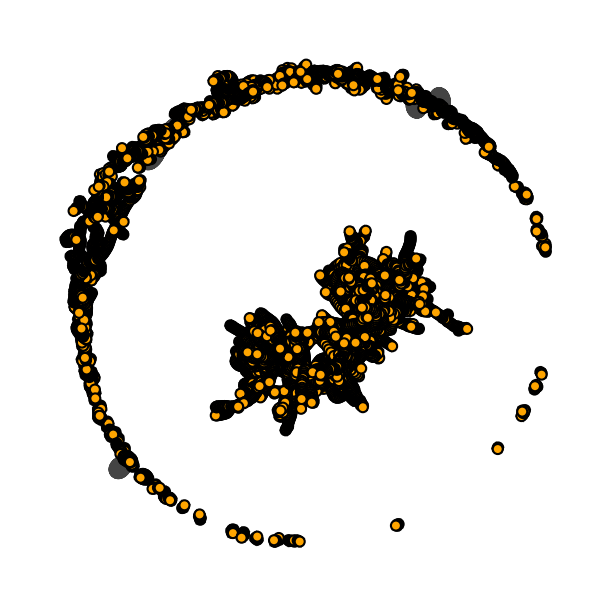

In [66]:
# Converting our NetworkX graph into an igraph so we can visualize it using Matplotlib
ig_graph = ig.Graph.from_networkx(G)

# Defining a dictionary for visual styles
visual_style = {
    "vertex_size": 10,
    "vertex_color": "orange",
    "vertex_label": None,
    "edge_width": 5,
    "edge_color": "#444444",
    "layout": "kamada_kawai",
}

# Creating a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)

# Plotting the graph using igraph, but targeting the Matplotlib axes
ig.plot(
    ig_graph,
    target=ax,
    **visual_style
)

# Customizing and show the plot using Matplotlib commands
plt.axis('off')
plt.show()


## 2.3 Shortest Path with Djikstra

In [ ]:
# Assigning coordinates for our cities & countries of interest
PORTUGAL_COORDS = (38.736946, -9.142685)  # (lat, lon) for Lisbon, Portugal
BRAZIL_COORDS = (-3.731862, -38.526669)   # (lat, lon) for Fortaleza, Brazil 

In [ ]:
# Defining the function to find closest cable node to our cities of interest
def find_closest_node(graph, target_coords):

    target_lat, target_lon = target_coords
    closest_node_id = None
    min_dist = float('inf')

    # We iterate through all nodes and their data (attributes)
    for node_id, attributes in graph.nodes(data=True):
        node_lon, node_lat = attributes['pos']
        
        dist = great_circle((target_lat, target_lon), (node_lat, node_lon)).kilometers
        
        if dist < min_dist:
            min_dist = dist
            closest_node_id = node_id
            
    print(f"Found closest node for target {target_coords}: '{closest_node_id}' (Distance: {min_dist:.2f} km)")
    return closest_node_id

In [ ]:
# Defining the function for the Dijkstra algorithm
def dijkstra_sp(graph, source, target):
    
    # Calculating the shortest path using Djikstra algorithm
    path_length = nx.dijkstra_path_length(
        graph, source=source, target=target, weight='weight')

    # Get the actual sequence of nodes in the path
    path_nodes = nx.dijkstra_path(
        graph, source=source, target=target, weight='weight')

    print(f"Total distance: {path_length:,.2f} km")
    print(f"Path involves {len(path_nodes)} nodes.")
    return path_nodes

In [ ]:
# Identifying start (Portugal) and end (Brazil) nodes in the graph
start_node = find_closest_node(G, PORTUGAL_COORDS)
end_node = find_closest_node(G, BRAZIL_COORDS)

In [ ]:
shortest_path_nodes = dijkstra_sp(G, start_node, end_node)
shortest_path_nodes

In [ ]:
# Matching shortest path nodes to the additional data in the initial nodes DF
path_nodes_gdf = gdf_nodes_json.set_index('node_id').loc[shortest_path_nodes]

# Creating the path line
path_line = LineString(path_nodes_gdf.geometry)
path_line_gdf = gpd.GeoDataFrame(geometry=[path_line], crs="EPSG:4326")
m = path_line_gdf.explore(
    color="blue",
    style_kwds={'weight': 3},
    name="Shortest Path Line"
)

# Representing the individual path nodes
path_nodes_gdf.explore(
    m=m,
    marker_type='circle_marker',
    marker_kwds={'radius': 4, 'fill': True, 'color': 'green'},
    tooltip=['node_id', 'cable_id'],
    name="Path Nodes"
)

## 2.4 Second Shortest Path

In [ ]:
# Now, assuming the scenario that the shortest path undersea cable is destroyed, 
# what is the next shortest path / route from Portugal to Brazil?
G_copy = G.copy()
G_copy.remove_nodes_from(shortest_path_nodes)
G_copy.number_of_nodes()

In [ ]:
start_node = find_closest_node(G_copy, PORTUGAL_COORDS)
end_node = find_closest_node(G_copy, BRAZIL_COORDS)

In [ ]:
shortest_path_nodes = dijkstra_sp(G_copy, start_node, end_node)
shortest_path_nodes

In [ ]:
# Matching shortest path nodes to the additional data in the initial nodes DF
path_nodes_gdf = gdf_nodes_json.set_index('node_id').loc[shortest_path_nodes]

# Creating the path line
path_line = LineString(path_nodes_gdf.geometry)
path_line_gdf = gpd.GeoDataFrame(geometry=[path_line], crs="EPSG:4326")
m = path_line_gdf.explore(
    color="blue",
    style_kwds={'weight': 3},
    name="Shortest Path Line"
)

# Representing the individual path nodes
path_nodes_gdf.explore(
    m=m,
    marker_type='circle_marker',
    marker_kwds={'radius': 4, 'fill': True, 'color': 'green'},
    tooltip=['node_id', 'cable_id'],
    name="Path Nodes"
)

# 3 K-Shortest Paths

In [ ]:
# Assigning coordinates for our cities & countries of interest
PORTUGAL_COORDS = (38.736946, -9.142685)  # (lat, lon) for Lisbon, Portugal
BRAZIL_COORDS = (-3.731862, -38.526669)   # (lat, lon) for Fortaleza, Brazil 

In [ ]:
start_node = find_closest_node(G_copy, PORTUGAL_COORDS)
end_node = find_closest_node(G_copy, BRAZIL_COORDS)

In [ ]:
def k_shortest_paths(graph, source, target, k):

    # Get the generator for the k-shortest simple paths
    paths_generator = nx.shortest_simple_paths(graph, source=source, target=target, weight='weight')

    # Loop through the generator using a counter to get the first k paths
    path_count = 0
    
    final_paths = []
    for path in paths_generator:
        # First, check if we have already found the number of paths we want
        if path_count >= k:
            break

        # The path is valid, so we process it
        path_length = nx.path_weight(graph, path, weight='weight')
        
        # We use our own counter for the path number
        print(f"Path #{path_count + 1}:  (Nodes: {len(path)})  Length: {path_length:,.2f} km")

        # Finally, increment our counter
        path_count += 1

        final_paths.append(path)
        
    return final_paths


In [ ]:
k_shortest_path_nodes = k_shortest_paths(k=5, graph=G, source=start_node, target=end_node)

In [ ]:
# Matching shortest path nodes to the additional data in the initial nodes DF
path_nodes_gdf = gdf_nodes_json.set_index('node_id').loc[k_shortest_path_nodes[1]]

# Creating the path line
path_line = LineString(path_nodes_gdf.geometry)
path_line_gdf = gpd.GeoDataFrame(geometry=[path_line], crs="EPSG:4326")
m = path_line_gdf.explore(
    color="blue",
    style_kwds={'weight': 3},
    name="Shortest Path Line"
)

# Representing the individual path nodes
path_nodes_gdf.explore(
    m=m,
    marker_type='circle_marker',
    marker_kwds={'radius': 4, 'fill': True, 'color': 'green'},
    tooltip=['node_id', 'cable_id'],
    name="Path Nodes"
)

In [ ]:
gdf_nodes_json[gdf_nodes_json["cable_id"] == "ellalink"].node_id

# 4 Combining the Two

In [18]:
# Assigning coordinates for our cities & countries of interest
PORTUGAL_COORDS = (38.736946, -9.142685)  # (lat, lon) for Lisbon, Portugal
BRAZIL_COORDS = (-3.731862, -38.526669)   # (lat, lon) for Fortaleza, Brazil 

In [19]:
# Defining the function to find closest cable node to our cities of interest
def find_closest_node(graph, target_coords):

    target_lat, target_lon = target_coords
    closest_node_id = None
    min_dist = float('inf')

    # We iterate through all nodes and their data (attributes)
    for node_id, attributes in graph.nodes(data=True):
        node_lon, node_lat = attributes['pos']
        
        dist = great_circle((target_lat, target_lon), (node_lat, node_lon)).kilometers
        
        if dist < min_dist:
            min_dist = dist
            closest_node_id = node_id
            
    print(f"Found closest node for target {target_coords}: '{closest_node_id}' (Distance: {min_dist:.2f} km)")
    return closest_node_id

In [20]:
# Defining the function for the Dijkstra algorithm
def dijkstra_sp(graph, source, target):
    
    # Calculating the shortest path using Djikstra algorithm
    path_length = nx.dijkstra_path_length(
        graph, source=source, target=target, weight='weight')

    # Get the actual sequence of nodes in the path
    path_nodes = nx.dijkstra_path(
        graph, source=source, target=target, weight='weight')

    print(f"Total distance: {path_length:,.2f} km")
    print(f"Path involves {len(path_nodes)} nodes.")
    return path_nodes

In [21]:
def k_shortest_paths(graph, source, target, k):

    # Get the generator for the k-shortest simple paths
    paths_generator = nx.shortest_simple_paths(graph, source=source, target=target, weight='weight')

    # Loop through the generator using a counter to get the first k paths
    path_count = 0
    
    final_paths = []
    for path in paths_generator:
        # First, check if we have already found the number of paths we want
        if path_count >= k:
            break

        # The path is valid, so we process it
        path_length = nx.path_weight(graph, path, weight='weight')
        
        # We use our own counter for the path number
        print(f"Path #{path_count + 1}:  (Nodes: {len(path)})  Length: {path_length:,.2f} km")

        # Finally, increment our counter
        path_count += 1

        final_paths.append(path)
        
    return final_paths


In [22]:
start_node = find_closest_node(G, PORTUGAL_COORDS)
end_node = find_closest_node(G, BRAZIL_COORDS)

Found closest node for target (38.736946, -9.142685): 'node_0310' (Distance: 1.41 km)
Found closest node for target (-3.731862, -38.526669): 'node_3539' (Distance: 2.32 km)


In [23]:
def shortest_paths(graph, source, target, algo='dijkstra', k=1, removal_line=None):

    working_graph = graph.copy()

    if removal_line:
        nodes_to_remove = gdf_nodes_json[gdf_nodes_json["cable_id"] == removal_line]['node_id'].tolist()
        print(f"Removed {len(nodes_to_remove)} nodes. The network is now damaged.")

        if nodes_to_remove:
            working_graph.remove_nodes_from(nodes_to_remove)

    if algo == 'dijkstra':
        return dijkstra_sp(working_graph, source, target)
        
    elif algo == 'yen':
        return k_shortest_paths(working_graph, source, target, k)

In [ ]:
# Normalize path format to be a list of lists
def normalize_paths(path):
    if path is None:
        return []
    if isinstance(path[0], str):
        return [path]
    return path

# Create LineStrings for each path
def create_lines_from_paths(paths, gdf_nodes):
    lines = []
    for subpath in paths:
        coords = []
        for node in subpath:
            geom = gdf_nodes[gdf_nodes["node_id"] == node]["geometry"]
            if not geom.empty:
                coords.append(geom.values[0])
        if len(coords) >= 2:
            lines.append(LineString(coords))
    return gpd.GeoSeries(lines)

In [24]:
# Example 1: Standard Dijkstra (removal_line is ignored)
print("--- RUNNING EXAMPLE 1 ---")
path1 = shortest_paths(G, start_node, end_node)

--- RUNNING EXAMPLE 1 ---
Total distance: 6,410.00 km
Path involves 26 nodes.


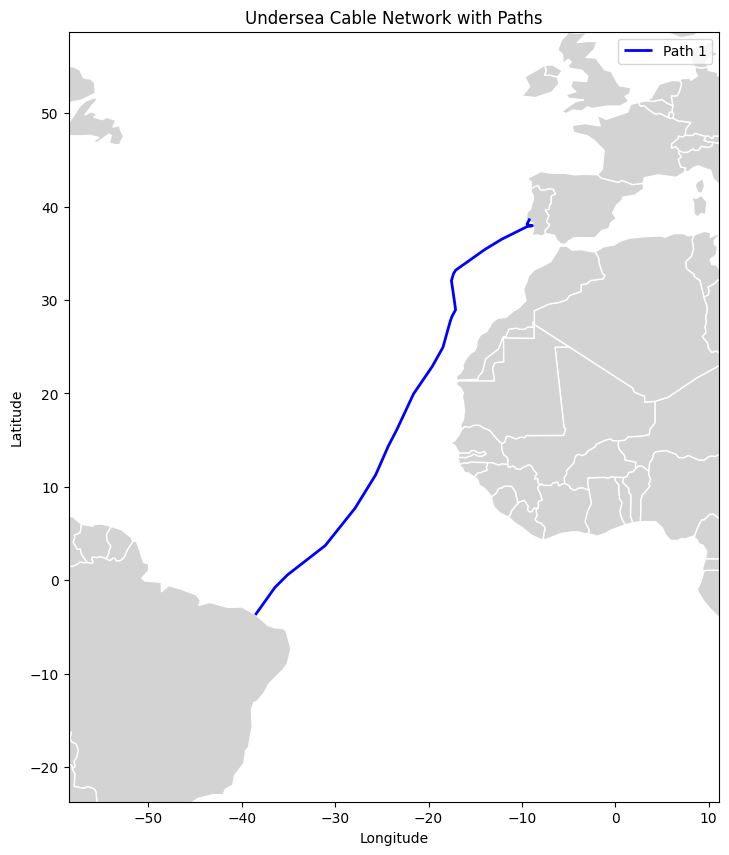

In [60]:
# Normalize list of nodes
path1 = normalize_paths(path1)

# Create GeoSeries of paths
lines1 = create_lines_from_paths(path1, gdf_nodes_json)

# Base map
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file("../data/map_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot(ax=ax, color="lightgray", edgecolor="white")

# Plot paths
lines1.plot(ax=ax, color="blue", linewidth=2, label="Path 1")

xmin, ymin, xmax, ymax = lines1.total_bounds
ax.set_xlim(xmin - 20, xmax + 20)
ax.set_ylim(ymin - 20, ymax + 20)

# Final styling
ax.set_title("Undersea Cable Network with Paths")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()

In [45]:
# Example 2: Dijkstra AFTER removing the "ellalink" cable
print("\n--- RUNNING EXAMPLE 2 ---")
path2 = shortest_paths(G, start_node, end_node, removal_line="ellalink")


--- RUNNING EXAMPLE 2 ---
Removed 24 nodes. The network is now damaged.
Total distance: 14,349.21 km
Path involves 35 nodes.


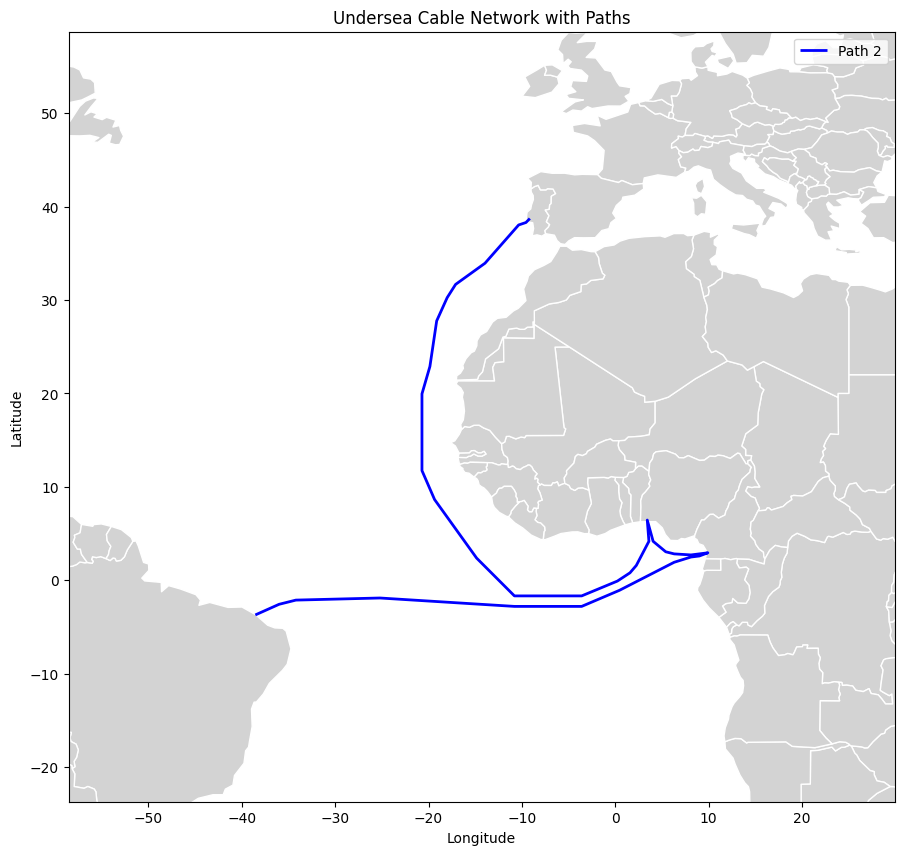

In [59]:
# Normalize list of nodes
path2 = normalize_paths(path2)

# Create GeoSeries of paths
lines2 = create_lines_from_paths(path2, gdf_nodes_json)

# Base map
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file("../data/map_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot(ax=ax, color="lightgray", edgecolor="white")

# Plot paths
lines2.plot(ax=ax, color="blue", linewidth=2, label="Path 2")

xmin, ymin, xmax, ymax = lines2.total_bounds
ax.set_xlim(xmin - 20, xmax + 20)
ax.set_ylim(ymin - 20, ymax + 20)

# Final styling
ax.set_title("Undersea Cable Network with Paths")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()

In [47]:
# Example 3: Top 3 paths on the full network
print("\n--- RUNNING EXAMPLE 3 ---")
path3 = shortest_paths(G, start_node, end_node, algo='yen', k=3)


--- RUNNING EXAMPLE 3 ---
Path #1:  (Nodes: 26)  Length: 6,410.00 km
Path #2:  (Nodes: 48)  Length: 8,733.71 km
Path #3:  (Nodes: 44)  Length: 8,841.92 km


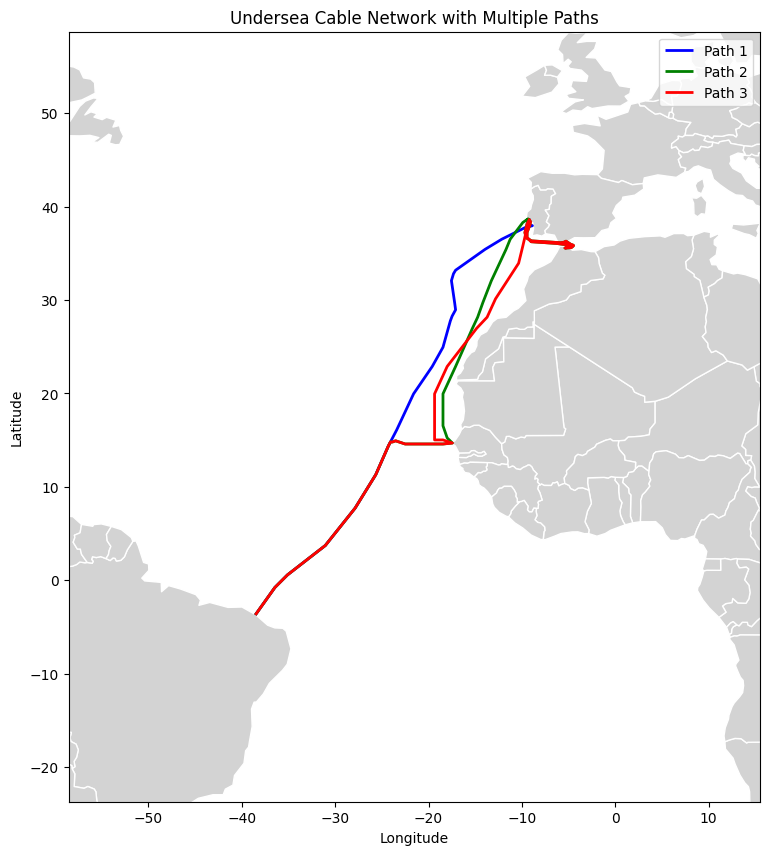

In [57]:
# Normalize list of nodes
path3 = normalize_paths(path3)

# Create GeoSeries of paths
lines3 = create_lines_from_paths(path3, gdf_nodes_json)

# Optional: Define your own color palette or use a colormap
colors = ['blue', 'green', 'red']

# Base map
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file("../data/map_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot(ax=ax, color="lightgray", edgecolor="white")

# Plot each LineString with a different color
for i, line in enumerate(lines3):
    color = colors[i % len(colors)]
    gpd.GeoSeries([line]).plot(ax=ax, color=color, linewidth=2, label=f"Path {i + 1}")

xmin, ymin, xmax, ymax = lines3.total_bounds
ax.set_xlim(xmin - 20, xmax + 20)
ax.set_ylim(ymin - 20, ymax + 20)

# Final styling
ax.set_title("Undersea Cable Network with Multiple Paths")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()

In [64]:
# Example 4: Top 3 paths AFTER removing the "ellalink" cable
print("\n--- RUNNING EXAMPLE 4 ---")
path4 = shortest_paths(G, start_node, end_node, algo='yen', k=3, removal_line="ellalink")


--- RUNNING EXAMPLE 4 ---
Removed 24 nodes. The network is now damaged.
Path #1:  (Nodes: 35)  Length: 14,349.21 km
Path #2:  (Nodes: 35)  Length: 14,538.55 km
Path #3:  (Nodes: 37)  Length: 14,782.77 km


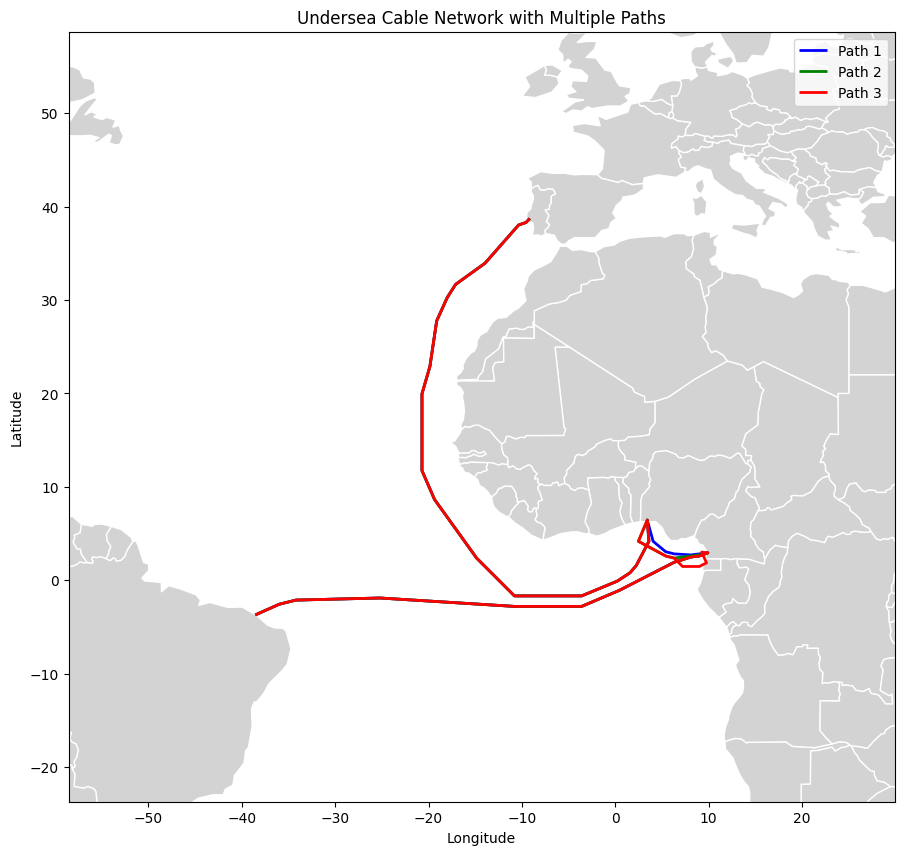

In [65]:
# Normalize list of nodes
path4 = normalize_paths(path4)

# Create GeoSeries of paths
lines4 = create_lines_from_paths(path4, gdf_nodes_json)

# Optional: Define your own color palette or use a colormap
colors = ['blue', 'green', 'red']

# Base map
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file("../data/map_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot(ax=ax, color="lightgray", edgecolor="white")

# Plot each LineString with a different color
for i, line in enumerate(lines4):
    color = colors[i % len(colors)]
    gpd.GeoSeries([line]).plot(ax=ax, color=color, linewidth=2, label=f"Path {i + 1}")

xmin, ymin, xmax, ymax = lines4.total_bounds
ax.set_xlim(xmin - 20, xmax + 20)
ax.set_ylim(ymin - 20, ymax + 20)

# Final styling
ax.set_title("Undersea Cable Network with Multiple Paths")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()